In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df1 = pd.read_csv("/content/drive/MyDrive/21-05-2022-NJ-0001-Deep-Learning-Model-Univariate-Data/Multivriate_Data.csv")

In [ ]:
df1

,Time,Speed,Rotation,Position,Translation,Label
0,0.020005,0.000030,1.570796,-199.999999,-300.0,0
1,0.040010,0.120060,1.570796,-199.997598,-300.0,0
2,0.060015,0.240090,1.570796,-199.992795,-300.0,0
3,0.080020,0.360120,1.570796,-199.985590,-300.0,0
4,0.100025,0.480150,1.570796,-199.975985,-300.0,0
...,...,...,...,...,...,...
287923,79.919980,9.918843,1.570796,145.766292,-100.0,0
287924,79.939985,9.920500,1.570796,145.964752,-100.0,0
287925,79.959990,9.922124,1.570796,146.163244,-100.0,0
287926,79.979995,9.923714,1.570796,146.361768,-100.0,0


# ***Preparing the data***

In [ ]:
import numpy as np

y = df1['Label']
df1 = df1.drop("Label", axis=1)
#normalized_df=(df1-df1.mean())/df1.std()
X = np.asarray(df1)
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
X, y = shuffle(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# ***Making the models***

In [ ]:
import os
import keras
import numpy as np
import pandas as pd
import keras.backend as K
from sklearn.cluster import SpectralClustering
from time import time
from keras import callbacks
from keras.models import Model
from tensorflow.keras.optimizers import SGD
from keras.layers import Dense, Input, Dropout
from keras.initializers import VarianceScaling
#from scipy.misc import imread
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, normalized_mutual_info_score
import tensorflow as tf

# ***Simple RNN***


In [ ]:
from tensorflow.keras.layers import GlobalMaxPool1D
def get_rnn(input_length, opt):
  model = Sequential()
  model.add(Input(shape=(input_length, 1)))
  model.add(SimpleRNN(units=64, return_sequences=True, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(units=5, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(units=3, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(units=4, activation='relu'))
  model.add(BatchNormalization())
  model.add(GlobalMaxPool1D())
  model.add(Dense(4, activation='softmax'))
  model.compile(metrics='acc',optimizer=opt,loss='categorical_crossentropy')
  return model



In [ ]:
from tensorflow.keras.utils import to_categorical
y1=to_categorical(y_train)
y_val1=to_categorical(y_val)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import time
from sklearn import metrics
# importing the module
import tracemalloc


lr=0.001
opt=tf.keras.optimizers.Adam(lr)
model2 = get_rnn(5,opt)
model2.summary()
# starting the monitoring
tracemalloc.start()
start = time.process_time()
history2 = model2.fit(X_train,y1,epochs = 50, batch_size=1024,validation_data=(X_val,y_val1))
print(time.process_time() - start)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 5, 64)             4224      
                                                                 
 batch_normalization_26 (Bat  (None, 5, 64)            256       
 chNormalization)                                                
                                                                 
 dense_38 (Dense)            (None, 5, 5)              325       
                                                                 
 batch_normalization_27 (Bat  (None, 5, 5)             20        
 chNormalization)                                                
                                                                 
 dense_39 (Dense)            (None, 5, 3)              18        
                                                                 
 batch_normalization_28 (Bat  (None, 5, 3)            

3.1222906069997407


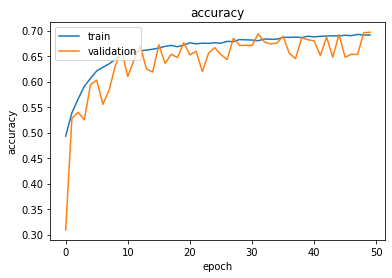

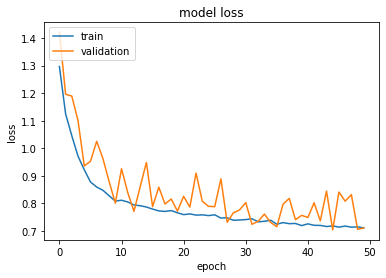

the model is rnn
the optimizer is <keras.optimizer_v2.adam.Adam object at 0x7f65add4a090>
the confusion matrix is [[22952  1170   675    39]
 [ 2580  4465   495  1634]
 [ 2502   433  3513     9]
 [ 1607  2938   411  2086]]


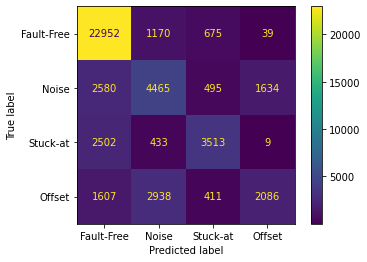

the accuracy for test is is 0.6949420109873918
              precision    recall  f1-score   support

  Fault-Free       0.77      0.92      0.84     24836
       Noise       0.50      0.49      0.49      9174
    Stuck-at       0.69      0.54      0.61      6457
      Offset       0.55      0.30      0.39      7042

    accuracy                           0.69     47509
   macro avg       0.63      0.56      0.58     47509
weighted avg       0.68      0.69      0.68     47509

(0, 0)


In [ ]:
start = time.process_time()
yp =model2.predict(X_test)
print(time.process_time() - start)
ypred = np.argmax(yp, axis=1)
actual=y_test
predicted=ypred
plt.plot(history2.history['acc'])
plt.title('model accuracy')
plt.plot(history2.history['val_acc'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


# "Loss"
plt.plot(history2.history['loss'])
plt.title('model loss')
plt.plot(history2.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
  
  
print("the model is rnn")
print("the optimizer is", opt)
matrix = confusion_matrix(actual,predicted, labels=[0,1,2,3])
print("the confusion matrix is", matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                               display_labels=['Fault-Free','Noise','Stuck-at','Offset'])
disp.plot()

plt.show()  
print("the accuracy for test is is", accuracy_score(y_test,ypred))
target_names = ['Fault-Free','Noise','Stuck-at','Offset']
print(classification_report(actual, predicted, target_names=target_names))

# displaying the memory
print(tracemalloc.get_traced_memory())
# stopping the library
tracemalloc.stop()

# ***Autoencoder based classifier***

In [ ]:
import os
import keras
import numpy as np
import pandas as pd
import keras.backend as K
from sklearn.cluster import SpectralClustering
from time import time
from keras import callbacks
from keras.models import Model
from tensorflow.keras.optimizers import SGD
from keras.layers import Dense, Input, Dropout
from keras.initializers import VarianceScaling
#from scipy.misc import imread
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, normalized_mutual_info_score
import tensorflow as tf

In [ ]:
# Building the Input Layer
input_layer = Input(shape =(5, ))
  
# Building the Encoder network
encoded = Dense(4, activation ='relu')(input_layer)
encoded = BatchNormalization()(encoded)
encoded = Dense(4, activation ='relu')(encoded)
encoded = BatchNormalization()(encoded)
encoded = Dense(8, activation ='relu')(encoded)
encoded = BatchNormalization()(encoded)
encoded = Dense(4, activation ='relu')(encoded)

  
# Building the Decoder network

decoded = Dense(4, activation ='relu')(encoded)
decoded = BatchNormalization()(decoded)
decoded = Dense(8, activation ='relu')(decoded)
decoded = BatchNormalization()(decoded)
decoded = Dense(4, activation ='relu')(decoded)
decoded = BatchNormalization()(decoded)
decoded = Dense(4, activation ='relu')(decoded)
  
# Building the Output Layer
output_layer = Dense(4, activation ='softmax')(decoded)

In [ ]:
# Defining the parameters of the Auto-encoder network
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer ="adam", loss ="categorical_crossentropy",metrics='acc')
  
# Training the Auto-encoder network


In [ ]:

lr=0.001
opt=tf.keras.optimizers.Adam(lr)
from tensorflow.keras.utils import to_categorical
y1=to_categorical(y_train)
# starting the monitoring
tracemalloc.start()
start = time.process_time()
history3 = autoencoder.fit(X_train,y1,epochs=50, batch_size=512,validation_data=(X_val,y_val1))
print(time.process_time() - start)


Epoch 1/50
377/377 [==============================] - 3s 9ms/step - loss: 0.9319 - acc: 0.6017 - val_loss: 0.9067 - val_acc: 0.6174
Epoch 2/50
377/377 [==============================] - 4s 10ms/step - loss: 0.9331 - acc: 0.6011 - val_loss: 0.9094 - val_acc: 0.6129
Epoch 3/50
377/377 [==============================] - 2s 5ms/step - loss: 0.9309 - acc: 0.6019 - val_loss: 0.9163 - val_acc: 0.6152
Epoch 4/50
377/377 [==============================] - 2s 4ms/step - loss: 0.9325 - acc: 0.6007 - val_loss: 0.9044 - val_acc: 0.6170
Epoch 5/50
377/377 [==============================] - 2s 5ms/step - loss: 0.9305 - acc: 0.6013 - val_loss: 0.8884 - val_acc: 0.6244
Epoch 6/50
377/377 [==============================] - 2s 5ms/step - loss: 0.9304 - acc: 0.6011 - val_loss: 0.8995 - val_acc: 0.6239
Epoch 7/50
377/377 [==============================] - 2s 5ms/step - loss: 0.9300 - acc: 0.6014 - val_loss: 0.8875 - val_acc: 0.6263
Epoch 8/50
377/377 [==============================] - 2s 5ms/step - loss: 0

2.264663779998955


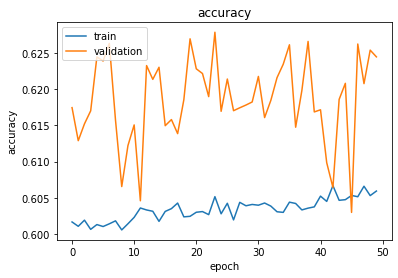

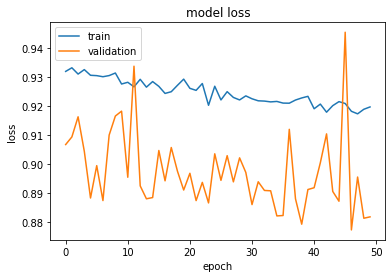

the model is autoencoders
the optimizer is <keras.optimizer_v2.adam.Adam object at 0x7f65add4a090>
the confusion matrix is [[22392  1190  1241    13]
 [ 4017  3449  1215   493]
 [ 3239   209  3009     0]
 [ 3235  2268   756   783]]


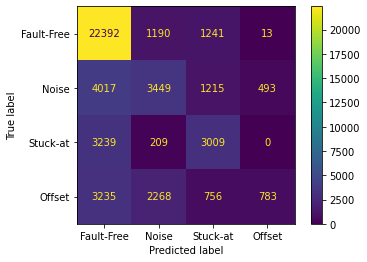

the accuracy for test is is 0.6237344503146772
              precision    recall  f1-score   support

  Fault-Free       0.68      0.90      0.78     24836
       Noise       0.48      0.38      0.42      9174
    Stuck-at       0.48      0.47      0.47      6457
      Offset       0.61      0.11      0.19      7042

    accuracy                           0.62     47509
   macro avg       0.56      0.46      0.47     47509
weighted avg       0.61      0.62      0.58     47509

(0, 0)


In [ ]:
start = time.process_time()
yp =autoencoder.predict(X_test)
print(time.process_time() - start)
ypred = np.argmax(yp, axis=1)
actual=y_test
predicted=ypred
plt.plot(history3.history['acc'])
plt.title('model accuracy')
plt.plot(history3.history['val_acc'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


# "Loss"
plt.plot(history3.history['loss'])
plt.title('model loss')
plt.plot(history3.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
  
  
print("the model is autoencoders")
print("the optimizer is", opt)
matrix = confusion_matrix(actual,predicted, labels=[0,1,2,3])
print("the confusion matrix is", matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                               display_labels=['Fault-Free','Noise','Stuck-at','Offset'])
disp.plot()

plt.show()  
print("the accuracy for test is is", accuracy_score(y_test,ypred))
target_names = ['Fault-Free','Noise','Stuck-at','Offset']
print(classification_report(actual, predicted, target_names=target_names))

# displaying the memory
print(tracemalloc.get_traced_memory())
# stopping the library
tracemalloc.stop()

# ***Transformers based classifier***

In [ ]:
from keras import layers
import keras
import tensorflow as tf
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads,
                                             key_dim=embed_dim)
        self.ffn = keras.Sequential([
            layers.Dense(ff_dim, activation="relu"),
            layers.Dense(embed_dim),
        ])
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)  # self-attention layer
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)  # layer norm
        ffn_output = self.ffn(out1)  #feed-forward layer
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)  # layer norm

In [ ]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size,
                                          output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [ ]:
def transatt(input_length, opt):
  embed_dim = 40 # Embedding size for each token
  num_heads = 5  # Number of attention heads
  ff_dim = 6  # Hidden layer size in feed forward network inside transformer

  model = keras.Sequential()
  model.add(layers.Dense(5, activation='relu'))
  model.add(layers.Input(shape=(input_length, )))
  model.add(TokenAndPositionEmbedding(input_length, 1000000, embed_dim))
  model.add(TransformerBlock(embed_dim, num_heads, ff_dim))
  model.add(layers.GlobalAveragePooling1D())
  model.add(layers.Dropout(0.1))
  model.add(layers.Dense(ff_dim, activation='relu'))
  model.add(layers.Dropout(0.1))
  model.add(layers.Dense(4, activation='softmax'))
  model.compile(metrics='acc',optimizer=opt,loss='categorical_crossentropy')
  return model

In [ ]:
lr=0.001
from tensorflow.keras.utils import to_categorical
y1=to_categorical(y_train)
y_val1=to_categorical(y_val)
opt=tf.keras.optimizers.Adam(lr)
model3 = transatt(5,opt)
# starting the monitoring
start = time.process_time()
history = model3.fit(X_train,y1,epochs = 50, batch_size=2048,validation_data=(X_val,y_val1))
print(time.process_time() - start)

Epoch 1/50
95/95 [==============================] - 63s 635ms/step - loss: 1.3741 - acc: 0.5071 - val_loss: 1.3410 - val_acc: 0.5264
Epoch 2/50
95/95 [==============================] - 54s 564ms/step - loss: 1.3221 - acc: 0.5227 - val_loss: 1.3014 - val_acc: 0.5286
Epoch 3/50
95/95 [==============================] - 54s 564ms/step - loss: 1.2850 - acc: 0.5241 - val_loss: 1.2601 - val_acc: 0.5292
Epoch 4/50
95/95 [==============================] - 55s 579ms/step - loss: 1.2194 - acc: 0.5270 - val_loss: 1.1776 - val_acc: 0.5336
Epoch 5/50
95/95 [==============================] - 54s 566ms/step - loss: 1.1778 - acc: 0.5298 - val_loss: 1.1566 - val_acc: 0.5365
Epoch 6/50
95/95 [==============================] - 53s 560ms/step - loss: 1.1635 - acc: 0.5320 - val_loss: 1.1426 - val_acc: 0.5405
Epoch 7/50
95/95 [==============================] - 53s 561ms/step - loss: 1.1535 - acc: 0.5362 - val_loss: 1.1329 - val_acc: 0.5431
Epoch 8/50
95/95 [==============================] - 54s 564ms/step - 

4.705253762000211


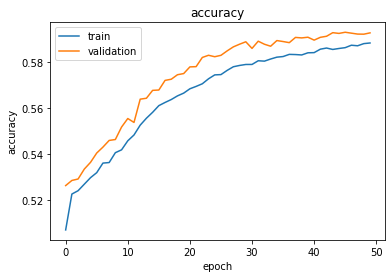

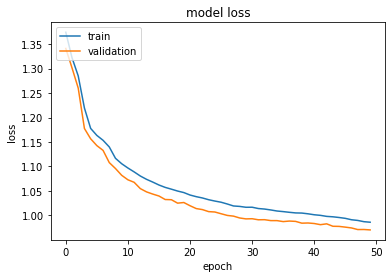

the model is transformers
the optimizer is <keras.optimizer_v2.adam.Adam object at 0x7f65add4a090>
the confusion matrix is [[23687   546   603     0]
 [ 6588  2033   520    33]
 [ 4183    38  2236     0]
 [ 4977  1718   298    49]]


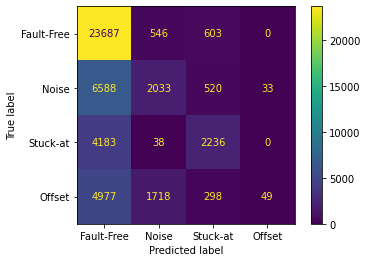

the accuracy for test is is 0.589467258835168
              precision    recall  f1-score   support

  Fault-Free       0.60      0.95      0.74     24836
       Noise       0.47      0.22      0.30      9174
    Stuck-at       0.61      0.35      0.44      6457
      Offset       0.60      0.01      0.01      7042

    accuracy                           0.59     47509
   macro avg       0.57      0.38      0.37     47509
weighted avg       0.58      0.59      0.51     47509

(0, 0)


In [ ]:
start = time.process_time()
yp =model3.predict(X_test)
print(time.process_time() - start)
ypred = np.argmax(yp, axis=1)
actual=y_test
predicted=ypred
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.plot(history.history['val_acc'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
  
  
print("the model is transformers")
print("the optimizer is", opt)
matrix = confusion_matrix(actual,predicted, labels=[0,1,2,3])
print("the confusion matrix is", matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                               display_labels=['Fault-Free','Noise','Stuck-at','Offset'])
disp.plot()

plt.show()  
print("the accuracy for test is is", accuracy_score(y_test,ypred))
target_names = ['Fault-Free','Noise','Stuck-at','Offset']
print(classification_report(actual, predicted, target_names=target_names))

# displaying the memory
print(tracemalloc.get_traced_memory())
# stopping the library
tracemalloc.stop()

# ***GRU+Simple RNN***

In [ ]:
from tensorflow.keras.layers import GlobalMaxPool1D
def get_grurnn(input_length, opt):
  model = Sequential()
  model.add(Input(shape=(input_length, 1)))
  model.add(GRU(units=64, return_sequences=True, activation='relu'))
  model.add(SimpleRNN(units=64, return_sequences=True, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(units=5, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(units=3, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(units=4, activation='relu'))
  model.add(BatchNormalization())
  model.add(GlobalMaxPool1D())
  model.add(Dense(4, activation='softmax'))
  model.compile(metrics='acc',optimizer=opt,loss='categorical_crossentropy')
  return model


In [ ]:
lr=0.001
opt=tf.keras.optimizers.Adam(lr)

# starting the monitoring
tracemalloc.start()
model4 = get_grurnn(5,opt)
start = time.process_time()
history4 = model4.fit(X_train,y1,epochs = 50, batch_size=2048,validation_data=(X_val,y_val1))
print(time.process_time() - start)


Epoch 1/50
95/95 [==============================] - 14s 104ms/step - loss: 1.6290 - acc: 0.3905 - val_loss: 1.4962 - val_acc: 0.3728
Epoch 2/50
95/95 [==============================] - 10s 103ms/step - loss: 1.2687 - acc: 0.4941 - val_loss: 1.2677 - val_acc: 0.4786
Epoch 3/50
95/95 [==============================] - 13s 138ms/step - loss: 1.1150 - acc: 0.5426 - val_loss: 1.2320 - val_acc: 0.4859
Epoch 4/50
95/95 [==============================] - 11s 112ms/step - loss: 1.0321 - acc: 0.5640 - val_loss: 1.1204 - val_acc: 0.5477
Epoch 5/50
95/95 [==============================] - 9s 98ms/step - loss: 0.9642 - acc: 0.5862 - val_loss: 1.1190 - val_acc: 0.5532
Epoch 6/50
95/95 [==============================] - 10s 104ms/step - loss: 0.9113 - acc: 0.5998 - val_loss: 1.2980 - val_acc: 0.5476
Epoch 7/50
95/95 [==============================] - 9s 97ms/step - loss: 0.8709 - acc: 0.6189 - val_loss: 0.9204 - val_acc: 0.6286
Epoch 8/50
95/95 [==============================] - 9s 98ms/step - loss: 

5.539587539999047


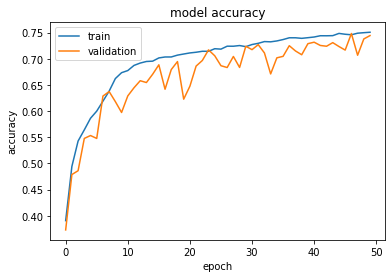

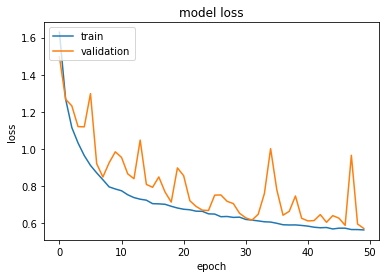

the model is gru+simplernn
the optimizer is <keras.optimizer_v2.adam.Adam object at 0x7f65a7e731d0>
the confusion matrix is [[22183  1130  1522     1]
 [ 1298  6328   458  1090]
 [ 1285   103  5056    13]
 [  858  3984   255  1945]]


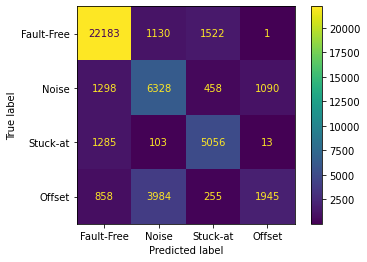

the accuracy is 0.7474794249510619
              precision    recall  f1-score   support

  Fault-Free       0.87      0.89      0.88     24836
       Noise       0.55      0.69      0.61      9174
    Stuck-at       0.69      0.78      0.74      6457
      Offset       0.64      0.28      0.39      7042

    accuracy                           0.75     47509
   macro avg       0.69      0.66      0.65     47509
weighted avg       0.75      0.75      0.73     47509

(20280327, 21556060)


In [ ]:
start = time.process_time()
yp =model4.predict(X_test)
print(time.process_time() - start)

ypred = np.argmax(yp, axis=1)
actual=y_test
predicted=ypred
plt.plot(history4.history['acc'])
plt.title('model accuracy')
plt.plot(history4.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history4.history['loss'])
plt.title('model loss')
plt.plot(history4.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
  
  
print("the model is gru+simplernn")
print("the optimizer is", opt)
matrix = confusion_matrix(actual,predicted, labels=[0,1,2,3])
print("the confusion matrix is", matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                               display_labels=['Fault-Free','Noise','Stuck-at','Offset'])
disp.plot()

plt.show()  
print("the accuracy is", accuracy_score(y_test,ypred))
target_names = ['Fault-Free','Noise','Stuck-at','Offset']
print(classification_report(actual, predicted, target_names=target_names))

# displaying the memory
print(tracemalloc.get_traced_memory())
# stopping the library
tracemalloc.stop()

# ***Bidirectional GRU +Bidirectional SimpleRNN***

In [ ]:
from tensorflow.keras.layers import GlobalMaxPool1D
def get_bigrurnn(input_length, opt):
  model = Sequential()
  model.add(Input(shape=(input_length, 1)))
  model.add(Bidirectional(GRU(units=64, return_sequences=True, activation='relu')))
  model.add(Bidirectional(SimpleRNN(units=64, return_sequences=True, activation='relu')))
  model.add(BatchNormalization())
  model.add(Dense(units=5, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(units=3, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(units=4, activation='relu'))
  model.add(BatchNormalization())
  model.add(GlobalMaxPool1D())
  model.add(Dense(4, activation='softmax'))
  model.compile(metrics='acc',optimizer=opt,loss='categorical_crossentropy')
  return model

In [ ]:
lr=0.001
opt=tf.keras.optimizers.Adam(lr)

# starting the monitoring
tracemalloc.start()
model5 = get_bigrurnn(5,opt)
start = time.process_time()
history5 = model5.fit(X_train,y1,epochs = 50, batch_size=2048,validation_data=(X_val,y_val1))
print(time.process_time() - start)

Epoch 1/50
95/95 [==============================] - 27s 226ms/step - loss: 1.1985 - acc: 0.5190 - val_loss: 1.3620 - val_acc: 0.4176
Epoch 2/50
95/95 [==============================] - 20s 213ms/step - loss: 1.0572 - acc: 0.5595 - val_loss: 1.2247 - val_acc: 0.4951
Epoch 3/50
95/95 [==============================] - 20s 212ms/step - loss: 0.9507 - acc: 0.5979 - val_loss: 1.1713 - val_acc: 0.4948
Epoch 4/50
95/95 [==============================] - 21s 218ms/step - loss: 0.8558 - acc: 0.6326 - val_loss: 1.1364 - val_acc: 0.4999
Epoch 5/50
95/95 [==============================] - 20s 214ms/step - loss: 0.7789 - acc: 0.6683 - val_loss: 0.9955 - val_acc: 0.5733
Epoch 6/50
95/95 [==============================] - 20s 215ms/step - loss: 0.7362 - acc: 0.6874 - val_loss: 0.8429 - val_acc: 0.6477
Epoch 7/50
95/95 [==============================] - 20s 215ms/step - loss: 0.7012 - acc: 0.7025 - val_loss: 0.8320 - val_acc: 0.6347
Epoch 8/50
95/95 [==============================] - 20s 213ms/step - 

7.606554049998522


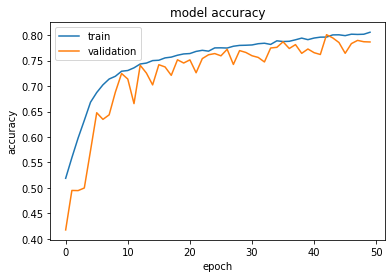

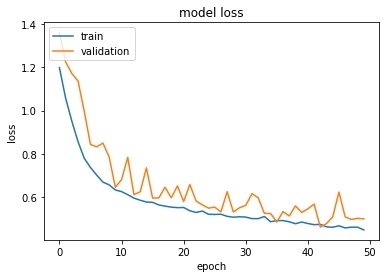

the model is bigru+birnn
the optimizer is <keras.optimizer_v2.adam.Adam object at 0x7f65aeceab50>
the confusion matrix is [[22806  1092   610   328]
 [  961  6998   169  1046]
 [ 1630   295  4515    17]
 [  832  2919   133  3158]]


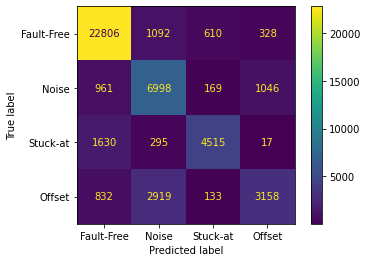

the accuracy is 0.7888400092614031
              precision    recall  f1-score   support

  Fault-Free       0.87      0.92      0.89     24836
       Noise       0.62      0.76      0.68      9174
    Stuck-at       0.83      0.70      0.76      6457
      Offset       0.69      0.45      0.54      7042

    accuracy                           0.79     47509
   macro avg       0.75      0.71      0.72     47509
weighted avg       0.79      0.79      0.78     47509

(25610599, 26902635)


In [ ]:
start = time.process_time()
yp =model5.predict(X_test)
print(time.process_time() - start)
ypred = np.argmax(yp, axis=1)
actual=y_test
predicted=ypred
plt.plot(history5.history['acc'])
plt.title('model accuracy')
plt.plot(history5.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"5
plt.plot(history5.history['loss'])
plt.title('model loss')
plt.plot(history5.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
  
  
print("the model is bigru+birnn")
print("the optimizer is", opt)
matrix = confusion_matrix(actual,predicted, labels=[0,1,2,3])
print("the confusion matrix is", matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                               display_labels=['Fault-Free','Noise','Stuck-at','Offset'])
disp.plot()

plt.show()  
print("the accuracy is", accuracy_score(y_test,ypred))
target_names = ['Fault-Free','Noise','Stuck-at','Offset']
print(classification_report(actual, predicted, target_names=target_names))

# displaying the memory
print(tracemalloc.get_traced_memory())
# stopping the library
tracemalloc.stop()

In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import LSTM, Dropout,Dense,RepeatVector,TimeDistributed,Input,BatchNormalization,RepeatVector
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Flatten

from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import Adam as adam

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras.models import load_model

In [ ]:
from keras.layers import GlobalAveragePooling1D
model6 = Sequential()
model6.add(LSTM(128, input_shape=(5,1)))
model6.add(Dropout(rate=0.2))
model6.add(RepeatVector(1))
model6.add(LSTM(128, return_sequences=True))
model6.add(Dropout(rate=0.2))
model6.add(TimeDistributed(Dense(4)))
model6.add(GlobalAveragePooling1D())
model6.add(Dense(4,activation='softmax'))

model6.compile(optimizer='adam', loss='categorical_crossentropy',metrics='acc')
model6.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 128)               66560     
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 repeat_vector_2 (RepeatVect  (None, 1, 128)           0         
 or)                                                             
                                                                 
 lstm_5 (LSTM)               (None, 1, 128)            131584    
                                                                 
 dropout_13 (Dropout)        (None, 1, 128)            0         
                                                                 
 time_distributed_2 (TimeDis  (None, 1, 4)             516       
 tributed)                                           

In [ ]:
start = time.process_time()
history6= model6.fit(X_train, y1,epochs=50,batch_size=2048,validation_data=(X_val,y_val1))
print(time.process_time() - start)

Epoch 1/50
95/95 [==============================] - 25s 230ms/step - loss: 1.1999 - acc: 0.5170 - val_loss: 1.1380 - val_acc: 0.5268
Epoch 2/50
95/95 [==============================] - 20s 208ms/step - loss: 1.0905 - acc: 0.5402 - val_loss: 1.0071 - val_acc: 0.5665
Epoch 3/50
95/95 [==============================] - 20s 208ms/step - loss: 0.9754 - acc: 0.5851 - val_loss: 0.8965 - val_acc: 0.6171
Epoch 4/50
95/95 [==============================] - 26s 277ms/step - loss: 0.8928 - acc: 0.6212 - val_loss: 0.8193 - val_acc: 0.6670
Epoch 5/50
95/95 [==============================] - 27s 283ms/step - loss: 0.8380 - acc: 0.6432 - val_loss: 0.7771 - val_acc: 0.6766
Epoch 6/50
95/95 [==============================] - 20s 213ms/step - loss: 0.8049 - acc: 0.6554 - val_loss: 0.7552 - val_acc: 0.6776
Epoch 7/50
95/95 [==============================] - 20s 207ms/step - loss: 0.7818 - acc: 0.6610 - val_loss: 0.7491 - val_acc: 0.6780
Epoch 8/50
95/95 [==============================] - 22s 234ms/step - 

7.193620638998254


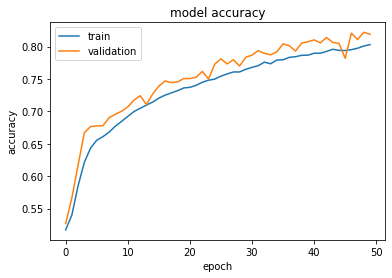

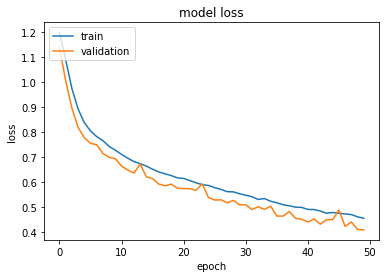

the model is lstm ae
the optimizer is <keras.optimizer_v2.adam.Adam object at 0x7f65aeceab50>
the confusion matrix is [[22820   935   739   342]
 [  732  7835    71   536]
 [ 1410   185  4845    17]
 [  675  2709   182  3476]]


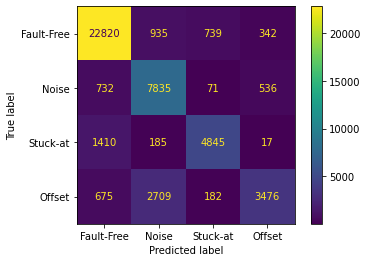

the accuracy is 0.820391925740386
              precision    recall  f1-score   support

  Fault-Free       0.89      0.92      0.90     24836
       Noise       0.67      0.85      0.75      9174
    Stuck-at       0.83      0.75      0.79      6457
      Offset       0.80      0.49      0.61      7042

    accuracy                           0.82     47509
   macro avg       0.80      0.75      0.76     47509
weighted avg       0.83      0.82      0.82     47509

(0, 0)


In [ ]:
start = time.process_time()
yp =model6.predict(X_test)
print(time.process_time() - start)
ypred = np.argmax(yp, axis=1)
actual=y_test
predicted=ypred
plt.plot(history6.history['acc'])
plt.title('model accuracy')
plt.plot(history6.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history6.history['loss'])
plt.title('model loss')
plt.plot(history6.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
  
  
print("the model is lstm ae")
print("the optimizer is", opt)
matrix = confusion_matrix(actual,predicted, labels=[0,1,2,3])
print("the confusion matrix is", matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                               display_labels=['Fault-Free','Noise','Stuck-at','Offset'])
disp.plot()

plt.show()  
print("the accuracy is", accuracy_score(y_test,ypred))
target_names = ['Fault-Free','Noise','Stuck-at','Offset']
print(classification_report(actual, predicted, target_names=target_names))

# displaying the memory
print(tracemalloc.get_traced_memory())
# stopping the library
tracemalloc.stop()

In [ ]:
models = list()
n_members = 6
models = [model2,model3,model4,model5,autoencoder,model6]



In [ ]:

from sklearn.linear_model import LogisticRegression
# create stacked model input dataset as outputs from the ensemble
def stacked_dataset(members, inputX):
	stackX = None
	for model in members:
		# make prediction
		yhat = model.predict(inputX, verbose=0)
		# stack predictions into [rows, members, probabilities]
		if stackX is None:
			stackX = yhat
		else:
			stackX = np.dstack((stackX, yhat))
	# flatten predictions to [rows, members x probabilities]
	stackX = stackX.reshape((stackX.shape[0], stackX.shape[1]*stackX.shape[2]))
	return stackX

In [ ]:
# fit a model based on the outputs from the ensemble members
def fit_stacked_model(members, inputX, inputy):
	# create dataset using ensemble
	stackedX = stacked_dataset(members, inputX)
	# fit standalone model
	model = LogisticRegression()
	model.fit(stackedX, inputy)
	return model

In [ ]:

# fit stacked model using the ensemble
start = time.process_time()
model = fit_stacked_model(models, X_test, y_test)
print(time.process_time() - start)

34.63102474999687


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
def stacked_prediction(members, model, inputX):
	# create dataset using ensemble
	stackedX = stacked_dataset(members, inputX)
	# make a prediction
	yhat = model.predict(stackedX)
	return yhat

In [ ]:
start = time.process_time()
yhat = stacked_prediction(models, model, X_test)
print(time.process_time() - start)
acc = accuracy_score(y_test, yhat)
print('Stacked Test Accuracy: %.3f' % acc)

29.49540483799865
Stacked Test Accuracy: 0.831


the model is ensemble
the optimizer is <keras.optimizer_v2.adam.Adam object at 0x7f65aeceab50>
the confusion matrix is [[23116   630   746   344]
 [  723  7596    86   769]
 [ 1303    97  5051     6]
 [  718  2460   131  3733]]


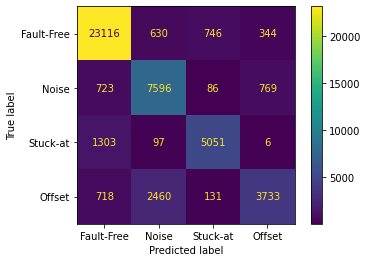

the accuracy is 0.8313372203161506
              precision    recall  f1-score   support

  Fault-Free       0.89      0.93      0.91     24836
       Noise       0.70      0.83      0.76      9174
    Stuck-at       0.84      0.78      0.81      6457
      Offset       0.77      0.53      0.63      7042

    accuracy                           0.83     47509
   macro avg       0.80      0.77      0.78     47509
weighted avg       0.83      0.83      0.83     47509

(0, 0)


In [ ]:
actual=y_test
predicted=yhat

  
  
print("the model is ensemble")
print("the optimizer is", opt)
matrix = confusion_matrix(actual,predicted, labels=[0,1,2,3])
print("the confusion matrix is", matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                               display_labels=['Fault-Free','Noise','Stuck-at','Offset'])
disp.plot()

plt.show()  
print("the accuracy is", accuracy_score(y_test,yhat))
target_names = ['Fault-Free','Noise','Stuck-at','Offset']
print(classification_report(actual, predicted, target_names=target_names))

# displaying the memory
print(tracemalloc.get_traced_memory())
# stopping the library
tracemalloc.stop()